# Logistic regression using titanic dataset
DatasetLink: [kaggle dataset](https://www.kaggle.com/competitions/titanic/overview)


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dev/MLE/Datasets/titanic_dataset.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


(1309, 12)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Feature engineering
-filling missing values

-variable transformation

In [7]:
len(list(df.columns.values))
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


age, cabin and embarked has a lot of nulls so we got to fill them

<Axes: >

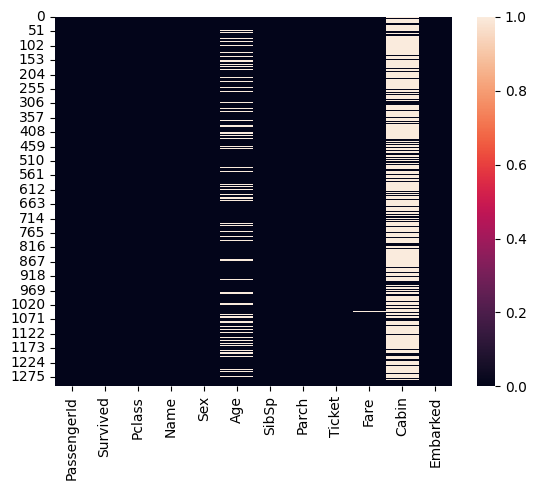

In [11]:
sns.heatmap(df.isnull()) # false are the black color lines, true are white color lines


for our logistic regression we dont need to know cabin as cabin is some random string which might not be very uselful because of the large quantity of nan

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.drop(["Cabin"],axis=1,inplace=True)

In [15]:
df.shape # its 11 not 12 because we dropped cabin

(1309, 11)

we will now try to fill embarked

In [17]:
df["Embarked"].unique()


,count
Embarked,
S,914
C,270
Q,123


since only 2 value is missing we can fill it with whatever of these unique value to fill in

In [18]:
df["Embarked"].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [19]:
df["Embarked"]=df["Embarked"].fillna("S")

In [20]:
df["Embarked"].value_counts() # the 2 nan is now S

,count
Embarked,
S,916
C,270
Q,123


In [21]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


we will work on filling nan of age. age is a continuous value unline embark which is a categorical vallue. there are many approach to fill which is a hyperparameter like filling it with mean, median or whatever that gets the best end result(hyper parameter tuning)

In [22]:

mean_age=df["Age"].mean()
mean_age

np.float64(29.881137667304014)

In [23]:
std_age=df["Age"].std()
std_age

14.413493211271334

In [24]:
low_age=mean_age-std_age
low_age

np.float64(15.46764445603268)

In [25]:
high_age=mean_age+std_age
high_age

np.float64(44.29463087857535)

In [26]:
random_ages=np.random.randint(15,44,263)
random_ages

array([17, 33, 31, 37, 17, 29, 24, 39, 35, 38, 18, 16, 26, 26, 18, 36, 20,
       21, 30, 29, 24, 26, 33, 20, 33, 30, 28, 26, 28, 28, 24, 41, 34, 22,
       38, 40, 35, 28, 16, 26, 18, 41, 36, 41, 39, 22, 39, 40, 31, 21, 41,
       30, 26, 27, 43, 30, 17, 26, 38, 38, 16, 19, 43, 20, 34, 41, 43, 43,
       22, 24, 22, 25, 26, 27, 30, 37, 21, 37, 27, 20, 35, 23, 37, 40, 41,
       36, 21, 36, 39, 21, 30, 17, 22, 33, 25, 43, 28, 28, 34, 19, 37, 26,
       42, 24, 35, 33, 22, 31, 18, 19, 19, 42, 40, 27, 21, 31, 40, 32, 24,
       15, 35, 38, 31, 15, 40, 41, 19, 21, 20, 40, 17, 36, 41, 41, 31, 22,
       43, 25, 32, 41, 25, 21, 29, 24, 26, 27, 34, 33, 23, 20, 17, 22, 18,
       36, 33, 35, 20, 16, 31, 28, 29, 21, 30, 15, 38, 28, 25, 40, 18, 39,
       21, 19, 26, 36, 40, 41, 26, 35, 24, 43, 29, 29, 32, 23, 41, 34, 39,
       18, 27, 22, 42, 19, 35, 27, 27, 41, 40, 22, 24, 31, 42, 15, 27, 20,
       36, 27, 24, 22, 18, 17, 19, 19, 35, 39, 42, 18, 42, 33, 42, 31, 15,
       21, 34, 31, 39, 43

In [27]:
age_copy=df["Age"].copy()
age_copy

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
1304,NaN
1305,39.0
1306,38.5
1307,NaN


In [28]:
age_copy[np.isnan(age_copy)]=random_ages
age_copy

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
1304,43.0
1305,39.0
1306,38.5
1307,39.0


In [29]:
df["Age"]=age_copy

In [30]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Variable transform

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,43.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,39.0,0,0,359309,8.0500,S


In [34]:
df["Sex"]=df["Sex"].map({"male":"0","female":"1"})

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,43.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,39.0,0,0,359309,8.0500,S


hot encoding embarked coz it has more than binary categroies

In [37]:
boarding_point=pd.get_dummies(df["Embarked"],drop_first=True)
boarding_point

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
1304,False,True
1305,False,False
1306,False,True
1307,False,True


In [38]:
df.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)


In [39]:
df=pd.concat([df,boarding_point],axis=1)


# Logistic regression

In [40]:
X=df.drop("Survived",axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
1304,3,0,43.0,0,0,8.0500,False,True
1305,1,1,39.0,0,0,108.9000,False,False
1306,3,0,38.5,0,0,7.2500,False,True
1307,3,0,39.0,0,0,8.0500,False,True


In [41]:
Y=df["Survived"]
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,1
1306,0
1307,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [44]:
model=LogisticRegression(max_iter=500)

In [45]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [46]:
predicted_res=model.predict(X_test)
predicted_res

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [49]:
accuracy_score(y_test,predicted_res)  # tp+tn /tp+tn+fp+fn


0.8422391857506362

# accuracy is 84%

In [50]:
confusion_matrix(y_test,predicted_res)


array([[214,  26],
       [ 36, 117]])


214-> 1 survived : model->survived 26 -> 0 Not survived : model->survived

117-> 0 Not survived : model->Not survived 36-> 1 survived : model -> Not Survived

In [51]:
print(classification_report(y_test,predicted_res))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.82      0.76      0.79       153

    accuracy                           0.84       393
   macro avg       0.84      0.83      0.83       393
weighted avg       0.84      0.84      0.84       393



In [52]:
y_test.value_counts()


,count
Survived,
0,240
1,153


In [53]:
print("0",(predicted_res==0).sum())
print("1",(predicted_res==1).sum())

0 250
1 143
